In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
alc_df = pd.read_csv("Resources/heavy_drinking_data.csv")
alc_df = alc_df.rename(columns={"REF_DATE":"Year","GEO":"Country","VALUE":"Number of People"})
alc_df= alc_df[["Year","Country","Age group","Indicators","Characteristics","Number of People"]]

In [20]:
clean_alc_df = alc_df.loc[alc_df["Characteristics"]=="Number of persons",:]
clean_alc_df

,Year,Country,Age group,Indicators,Characteristics,Number of People
0,2015,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,5782800.0
1,2016,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,5770900.0
2,2017,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,6015500.0
3,2018,Canada (excluding territories),"Total, 12 years and over",Heavy drinking,Number of persons,5946400.0
8,2015,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,90600.0
9,2016,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,87900.0
10,2017,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,94300.0
11,2018,Canada (excluding territories),12 to 17 years,Heavy drinking,Number of persons,77100.0
16,2015,Canada (excluding territories),18 to 34 years,Heavy drinking,Number of persons,2469000.0
17,2016,Canada (excluding territories),18 to 34 years,Heavy drinking,Number of persons,2341200.0


In [29]:
total =clean_alc_df.loc[clean_alc_df["Age group"]=="Total, 12 years and over",:]
total = total[["Year","Number of People"]]
total

,Year,Number of People
0,2015,5782800.0
1,2016,5770900.0
2,2017,6015500.0
3,2018,5946400.0


In [30]:
reduced_alc_df = clean_alc_df.loc[clean_alc_df["Age group"]!="Total, 12 years and over",:].drop(columns=["Characteristics"])
reduced_alc_df

,Year,Country,Age group,Indicators,Number of People
8,2015,Canada (excluding territories),12 to 17 years,Heavy drinking,90600.0
9,2016,Canada (excluding territories),12 to 17 years,Heavy drinking,87900.0
10,2017,Canada (excluding territories),12 to 17 years,Heavy drinking,94300.0
11,2018,Canada (excluding territories),12 to 17 years,Heavy drinking,77100.0
16,2015,Canada (excluding territories),18 to 34 years,Heavy drinking,2469000.0
17,2016,Canada (excluding territories),18 to 34 years,Heavy drinking,2341200.0
18,2017,Canada (excluding territories),18 to 34 years,Heavy drinking,2417900.0
19,2018,Canada (excluding territories),18 to 34 years,Heavy drinking,2361800.0
24,2015,Canada (excluding territories),35 to 49 years,Heavy drinking,1459200.0
25,2016,Canada (excluding territories),35 to 49 years,Heavy drinking,1530500.0


In [46]:
groupby_df = reduced_alc_df.groupby(["Year","Age group"]).sum()
test = groupby_df.reset_index()
merge_df = pd.merge(test,total,on="Year",how="inner")
merge_df = merge_df.rename(columns={"Number of People_x":"Number of People","Number of People_y":"Total people"})
merge_df["Percent of age group"] = round((merge_df["Number of People"]/merge_df["Total people"])*100,2)
merge_df

,Year,Age group,Number of People,Total people,Percent of age group
0,2015,12 to 17 years,90600.0,5782800.0,1.57
1,2015,18 to 34 years,2469000.0,5782800.0,42.70
2,2015,35 to 49 years,1459200.0,5782800.0,25.23
3,2015,50 to 64 years,1400500.0,5782800.0,24.22
4,2015,65 years and over,363500.0,5782800.0,6.29
5,2016,12 to 17 years,87900.0,5770900.0,1.52
6,2016,18 to 34 years,2341200.0,5770900.0,40.57
7,2016,35 to 49 years,1530500.0,5770900.0,26.52
8,2016,50 to 64 years,1408600.0,5770900.0,24.41
9,2016,65 years and over,402800.0,5770900.0,6.98


In [48]:
teens = merge_df.loc[merge_df["Age group"]== "12 to 17 years"]
young_adults = merge_df.loc[merge_df["Age group"]=="18 to 34 years"]
mid_adults = merge_df.loc[merge_df["Age group"]=="35 to 49 years"]
older_adults= merge_df.loc[merge_df["Age group"]=="50 to 64 years"]
elderly = merge_df.loc[merge_df["Age group"]=="65 years and over"]
w=0.15
x=["2015","2016","2017","2018"]
bar1=np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]
bar5 = [i+w for i in bar4]


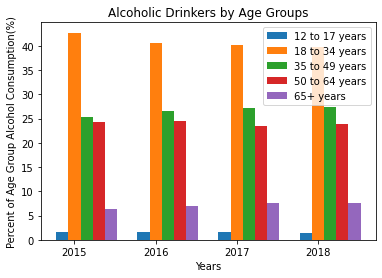

In [51]:
plt.bar(bar1,teens["Percent of age group"],w,label="12 to 17 years")
plt.bar(bar2,young_adults["Percent of age group"],w,label="18 to 34 years")
plt.bar(bar3,mid_adults["Percent of age group"],w,label="35 to 49 years")
plt.bar(bar4,older_adults["Percent of age group"],w,label="50 to 64 years")
plt.bar(bar5,elderly["Percent of age group"],w,label="65+ years")
plt.legend(loc="best")
plt.xticks(bar1+w,x)
plt.ylabel("Percent of Age Group Alcohol Consumption(%)")
plt.xlabel("Years")
plt.title("Alcoholic Drinkers by Age Groups")
plt.show()

In [12]:
cannibis_df = pd.read_csv("Resources/cannabis_usage_1961_2018.csv")
cannibis_df = cannibis_df.rename(columns={"REF_DATE":"Year","VALUE":"Value"})
cannibis_df.columns

Index(['Year', 'GEO', 'DGUID', 'Prevalence', 'Age group', 'Frequency of use',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'Value', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [13]:
clean_can_df = cannibis_df[["Year","Prevalence","Age group","Frequency of use","Value"]]
clean_can_df

,Year,Prevalence,Age group,Frequency of use,Value
0,1961,Consuming population of cannabis,15 years and over,"Total, all frequencies",277512.0
1,1961,Consuming population of cannabis,15 years and over,Once,17616.0
2,1961,Consuming population of cannabis,15 years and over,Less than once per month,97880.0
3,1961,Consuming population of cannabis,15 years and over,One to three times per month,51722.0
4,1961,Consuming population of cannabis,15 years and over,At least once a week (excludes daily),70428.0
...,...,...,...,...,...
4171,2018,Volume of cannabis consumed,65 years and over,Once,NaN
4172,2018,Volume of cannabis consumed,65 years and over,Less than once per month,NaN
4173,2018,Volume of cannabis consumed,65 years and over,One to three times per month,NaN
4174,2018,Volume of cannabis consumed,65 years and over,At least once a week (excludes daily),NaN


In [52]:
reduced_can_df = clean_can_df.loc[(clean_can_df["Year"]>=2015)&
                                 (clean_can_df["Prevalence"]=="Consuming population of cannabis")&
                                 (clean_can_df["Age group"]!="65 years and over")&
                                 (clean_can_df["Frequency of use"]=="Total, all frequencies"),: ]

In [54]:
reduced_can_df
total_df = reduced_can_df.loc[reduced_can_df["Age group"]=="15 years and over",["Year","Value"]]
total_df

,Year,Value
3888,2015,4540920.0
3960,2016,4701240.0
4032,2017,4876544.0
4104,2018,5034949.0


In [67]:
can_groupby_df = reduced_can_df.groupby(["Year","Age group"]).sum()
test = can_groupby_df.reset_index()
merge_can = pd.merge(test,total_df,on="Year",how="outer")
cannabis_df = merge_can.rename(columns={"Value_x":"Cannabis Consumers","Value_y":"Total People"})
cannabis_df["Percent of age group"] = round((cannabis_df["Cannabis Consumers"]/cannabis_df["Total People"])*100,2)
cannabis_df=cannabis_df.loc[cannabis_df["Age group"]!="15 years and over"]
cannabis_df


,Year,Age group,Cannabis Consumers,Total People,Percent of age group
0,2015,15 to 17 years,278713.0,4540920.0,6.14
2,2015,18 to 24 years,1266915.0,4540920.0,27.90
3,2015,25 to 44 years,1929152.0,4540920.0,42.48
4,2015,45 to 64 years,1066141.0,4540920.0,23.48
5,2016,15 to 17 years,284263.0,4701240.0,6.05
7,2016,18 to 24 years,1300556.0,4701240.0,27.66
8,2016,25 to 44 years,2013181.0,4701240.0,42.82
9,2016,45 to 64 years,1103239.0,4701240.0,23.47
10,2017,15 to 17 years,291277.0,4876544.0,5.97
12,2017,18 to 24 years,1341678.0,4876544.0,27.51


In [64]:
teen = cannabis_df.loc[(cannabis_df["Age group"]!= "25 to 44 years") & (cannabis_df["Age group"]!= "18 to 24 years") & (cannabis_df["Age group"]!= "45 to 64 years"),: ]
young_adults = cannabis_df.loc[cannabis_df["Age group"]=="18 to 24 years"]
mid_adults = cannabis_df.loc[cannabis_df["Age group"]=="25 to 44 years"]
older_adults= cannabis_df.loc[cannabis_df["Age group"]=="45 to 64 years"]
w=0.2
x=["2015","2016","2017","2018"]
bar1=np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]

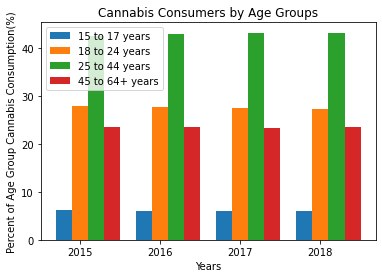

In [66]:
plt.bar(bar1,teen["Percent of age group"],w,label="15 to 17 years")
plt.bar(bar2,young_adults["Percent of age group"],w,label="18 to 24 years")
plt.bar(bar3,mid_adults["Percent of age group"],w,label="25 to 44 years")
plt.bar(bar4,older_adults["Percent of age group"],w,label="45 to 64+ years")
plt.legend(loc="best")
plt.xticks(bar1+w,x)
plt.ylabel("Percent of Age Group Cannabis Consumption(%)")
plt.xlabel("Years")
plt.title("Cannabis Consumers by Age Groups")
plt.show()